<a href="https://colab.research.google.com/github/SebastianBentert/example_code/blob/main/BitcoinpredTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitPredict

## Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-09-12 21:35:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-09-12 21:35:07 (7.13 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'Price from 1st of Oct 2013 to 18 of May 2021')

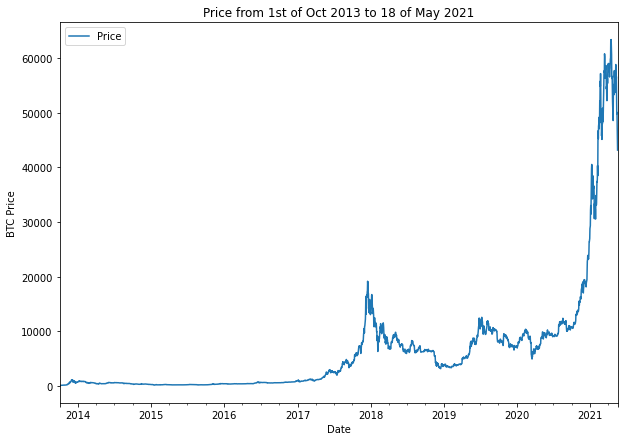

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price from 1st of Oct 2013 to 18 of May 2021')

## Importing time series data with Python's CSV module

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip column titles line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%d'))
    btc_price.append(float(line[2]))
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

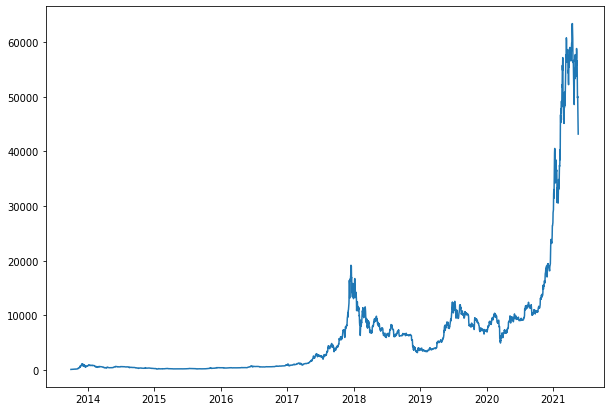

In [ ]:
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)

## Format data part 1: Create train and test sets

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [ ]:
split_size = int(0.8*len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train),len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

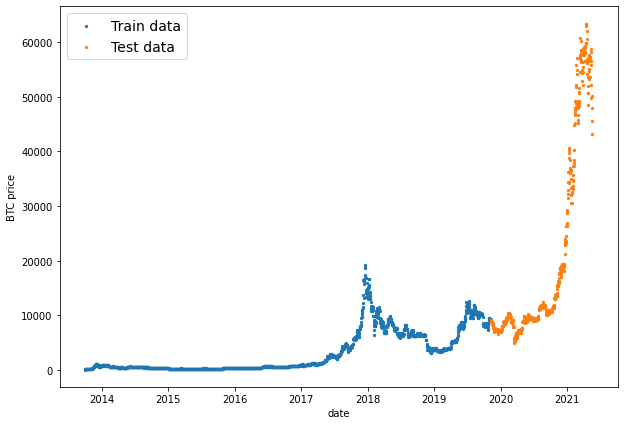

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Train data')
plt.scatter(X_test,y_test,s=5,label='Test data')
plt.xlabel('date')
plt.ylabel('BTC price')
plt.legend(fontsize=14)

## Create plotting function

In [ ]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):
  '''
  Plots timesteps (a series of points in time) against values (a series of values across timesteps)

  Args:
    timesteps: array of timestep values
    values: array of values across time
    format: stayle of plot, default '.'
    start: where to start the plot
    end: where to end the plot
    label: label of plot
  '''
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

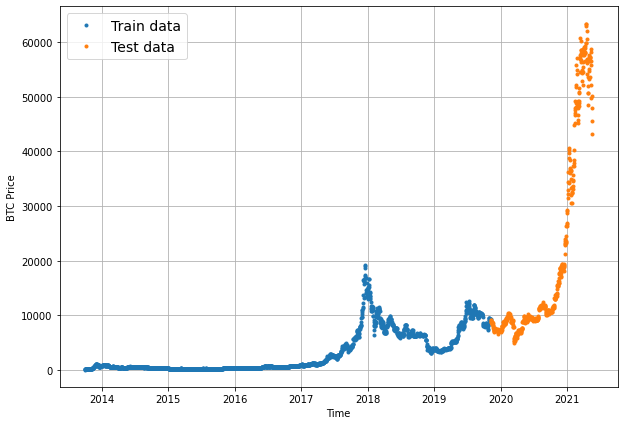

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label='Train data')
plot_time_series(timesteps=X_test,values=y_test,label='Test data')

## Modeling Experiments

* 0 Naive model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Dense model, h=1,w=30
* 3 Dense model, h=7,window=30
* 4 Conv1D
* 5 LSTM
* 6 Dense (with multivariate Data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model

## Model 0: Naive forecast (baseline)

$$\hat{y}_{t]} = y_{t-1}$$

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

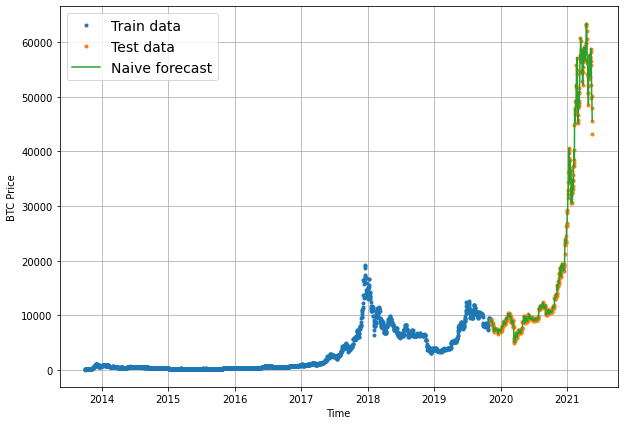

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label='Train data')
plot_time_series(timesteps=X_test,values=y_test,label='Test data')
plot_time_series(timesteps=X_test[1:],values=naive_forecast,label='Naive forecast',format='-')

## Evaluating a time series model

In [ ]:
import tensorflow as tf
def mase(y_true,y_pred): # mean absolute scaled error
  '''
  Implement MASE (no seasonality)
  '''
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] -y_true[:-1]))
  return mae/mae_naive

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true, y_pred = tf.cast(y_true,dtype=tf.float32), tf.cast(y_pred,dtype=tf.float32)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  evals = {'MAE' : tf.keras.metrics.mean_absolute_error(y_true,y_pred).numpy(),
           'MSE' : mse.numpy(),
           'RMSE': tf.sqrt(mse).numpy(),
           'MAPE': tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy(),
           'MASE': mase(y_true,y_pred).numpy()
           }
  return evals

In [ ]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)

In [ ]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

## Format data (windows&horizons)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labaled_windows(x,horizon=HORIZON):
  '''
  Creates labels for windowed dataset.
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [ ]:
test_window,test_label = get_labaled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  '''
  Turns a 1D array into a 2D array of sequential labeled windows of window_size with horizon size labels
  '''
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  windowed_array = x[window_indexes]
  windows,labels = get_labaled_windows(windowed_array,horizon=horizon)

  return windows,labels


In [ ]:
full_windows,full_labels = make_windows(prices)

In [ ]:
for i in range(3):
  print(full_windows[i],full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


In [ ]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

## Splitting data into train and test sets

In [ ]:
def make_train_test_splits(windows,labels,test_split=0.2):
  '''
  Splits matching pairs of windows and labels into train and test splits
  '''
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

## Modeling checkpoint callback

In [ ]:
import os

def create_model_checkpoint(model_name,save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
from tensorflow.keras import layers

model_1 = tf.keras.Sequential([
  layers.Dense(128,activation='relu'),
  layers.Dense(HORIZON, activation='linear')
], name='model_1')
model_1.compile(loss='mae',
                metrics=['mae','mse'])
model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 20ms/step - loss: 1162.0553 - mae: 1162.0553 - mse: 7254950.0000 - val_loss: 1377.7024 - val_mae: 1377.7024 - val_mse: 5354007.0000
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 231.9200 - mae: 231.9200 - mse: 250322.7969 - val_loss: 1442.7292 - val_mae: 1442.7292 - val_mse: 5450464.5000
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 221.8676 - mae: 221.8676 - mse: 231624.5156 - val_loss: 1506.7933 - val_mae: 1506.7933 - val_mse: 6688426.5000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 214.8368 - mae: 214.8368 - mse: 222131.8750 - val_loss: 1094.3815 - val_mae: 1094.3815 - val_mse: 3660498.7500
INFO:tensorflow:Assets written to: model_experiments/model_1/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 208.2036 - mae: 208.2036 - mse: 204462.3281 - val_l

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 732.6068 - mae: 732.6068 - mse: 1584453.7500


[732.6068115234375, 732.6068115234375, 1584453.75]

In [ ]:
model_1 = tf.keras.models.load_model('model_experiments/model_1/')
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 627.8931 - mae: 627.8931 - mse: 1357437.7500


[627.8931274414062, 627.8931274414062, 1357437.75]

## Making psuedo forecasts

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8988.459 , 8807.754 , 8933.47  , 8846.316 , 8732.756 , 8696.67  ,
        8740.512 , 8526.229 , 8478.959 , 8498.3125], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'MAE': 627.8931,
 'MAPE': 2.814929,
 'MASE': 1.1030343,
 'MSE': 1357437.9,
 'RMSE': 1165.0913}

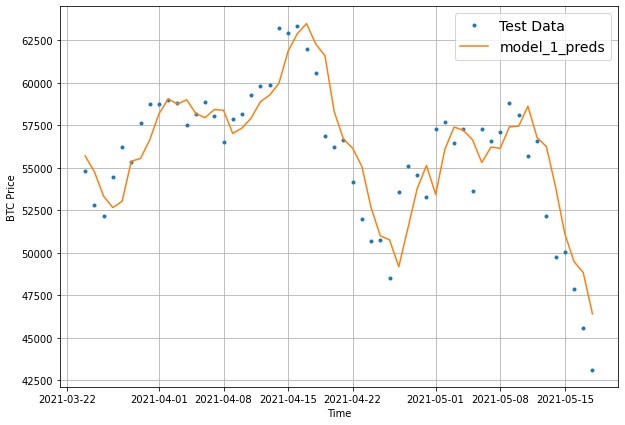

In [ ]:
offset = 500
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,label='model_1_preds',format='-')

## Model 2: Dense model (windows = 30, horizon = 1)

In [ ]:
WINDOW_SIZE = 30
HORIZON = 1
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [ ]:
model_2 = tf.keras.Sequential([layers.Dense(128,activation='relu'),
                               layers.Dense(HORIZON)],
                              name='model_2')
model_2.compile(loss='mae')

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets
INFO:tensorflow:Assets written to: model_experiments/model_2/assets


In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1897.7833


1897.7833251953125

In [ ]:
model_2 = tf.keras.models.load_model('model_experiments/model_2/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 775.3950


775.39501953125

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_2_preds)
model_2_results

{'MAE': 775.395,
 'MAPE': 3.444561,
 'MASE': 1.3553979,
 'MSE': 1951160.4,
 'RMSE': 1396.8395}

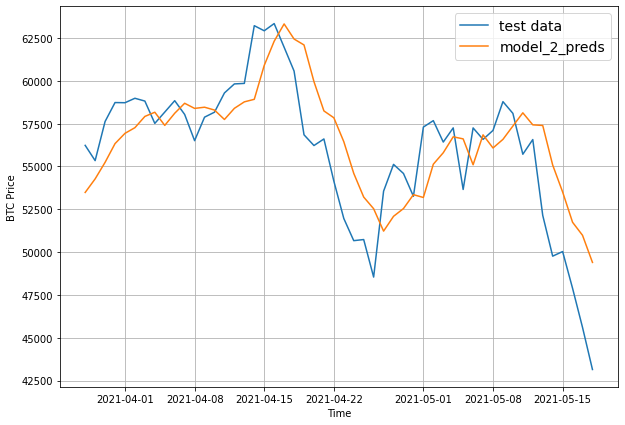

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,format='-',label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format='-',label='model_2_preds')

## Model 3: Dense model (windows = 30, horizon = 7)

In [ ]:
HORIZON = 7
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)


In [ ]:
model_3 = tf.keras.Sequential([layers.Dense(128,activation='relu'),
                               layers.Dense(HORIZON)],
                              name='model_3')
model_3.compile(loss='mae')

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets
INFO:tensorflow:Assets written to: model_experiments/model_3/assets


In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1632.8708


1632.870849609375

In [ ]:
model_3 = tf.keras.models.load_model('model_experiments/model_3/')
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1302.9008


1302.9007568359375

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9554.225 , 9739.818 , 9326.38  , 9386.394 , 9248.831 , 9379.803 ,
        9718.187 ],
       [9327.683 , 9433.904 , 9158.668 , 9106.823 , 8827.296 , 9246.315 ,
        9358.59  ],
       [9185.935 , 9251.527 , 9177.502 , 8987.677 , 8865.9795, 9241.855 ,
        9281.078 ],
       [9214.091 , 9333.513 , 9196.528 , 8975.005 , 8994.047 , 9301.004 ,
        9405.708 ],
       [9185.951 , 9328.39  , 9285.818 , 8981.174 , 9007.045 , 9239.636 ,
        9182.077 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

In [ ]:
model_3_results

{'MAE': array([  685.876   ,   457.21274 ,   437.36356 ,   576.2476  ,
          618.52234 ,   609.5975  ,   562.2337  ,   572.08936 ,
          546.2431  ,   641.3393  ,   946.7855  ,   915.9562  ,
          924.8332  ,  1046.5159  ,   923.55023 ,   550.73065 ,
          377.91943 ,   251.94768 ,   216.94908 ,   213.58852 ,
          161.52615 ,   200.55057 ,   298.21597 ,   257.6684  ,
          191.84904 ,   197.27219 ,   193.01912 ,   126.39181 ,
          130.08504 ,   229.40695 ,   279.50412 ,   381.20285 ,
          361.9896  ,   432.92242 ,   310.85092 ,   379.4255  ,
          413.44928 ,   377.60992 ,   272.38205 ,   158.39314 ,
          278.5355  ,   145.94022 ,   104.36217 ,   103.55622 ,
           88.951454,   116.90639 ,    94.18617 ,   152.3923  ,
          169.41887 ,   181.07234 ,    92.716866,   138.69865 ,
          256.917   ,   195.18945 ,   310.8441  ,   391.7313  ,
          417.6506  ,   483.1568  ,   483.32367 ,   550.71893 ,
          454.30972 ,   357.5605 

## Change evaluate_preds to work with bigger horizon

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  masee = mase(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    masee = tf.reduce_mean(masee)

  return {"MAE": mae.numpy(),
          "MSE": mse.numpy(),
          "RMSE": rmse.numpy(),
          "MAPE": mape.numpy(),
          "MASE": masee.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'MAE': 1302.9008,
 'MAPE': 5.941396,
 'MASE': 2.318439,
 'MSE': 5805278.5,
 'RMSE': 1495.1241}

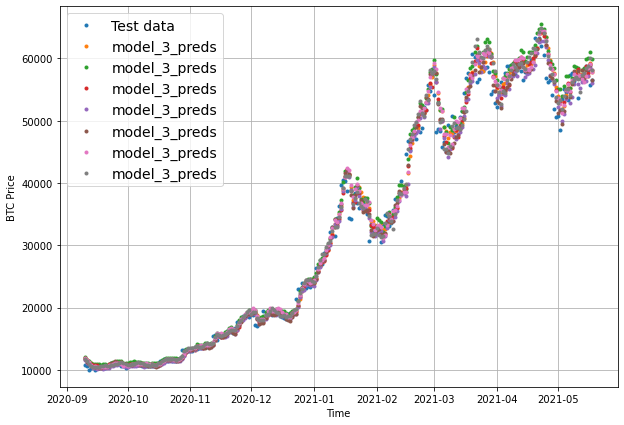

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0],start=offset,label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,start=offset,label='model_3_preds')

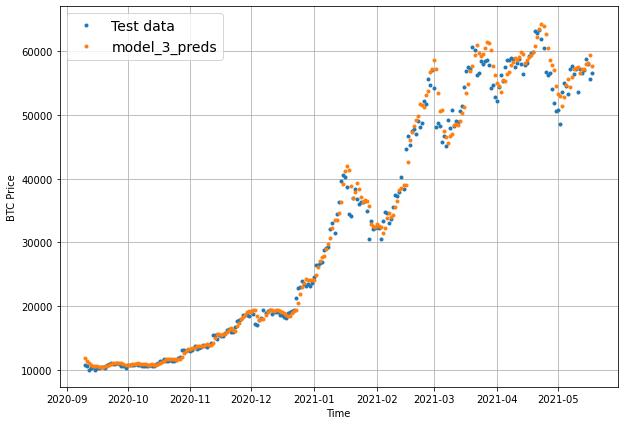

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0],start=offset,label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds,axis=1),start=offset,label='model_3_preds')

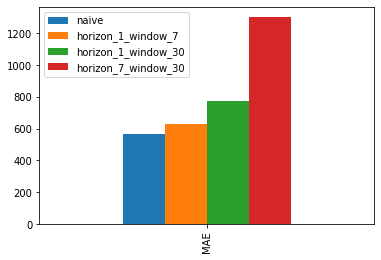

In [ ]:
pd.DataFrame({'naive':naive_results['MAE'],
              'horizon_1_window_7':model_1_results['MAE'],
              'horizon_1_window_30':model_2_results['MAE'],
              'horizon_7_window_30':model_3_results['MAE']},index=['MAE']).plot(kind='bar');

In [ ]:
model_3_results

{'MAE': 1302.9008,
 'MAPE': 5.941396,
 'MASE': 2.318439,
 'MSE': 5805278.5,
 'RMSE': 1495.1241}

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [ ]:
print(x.shape,expand_dims_layer(x).shape,expand_dims_layer(x))

(7,) (7, 1) tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [ ]:
model_4 = tf.keras.Sequential([expand_dims_layer,
                               layers.Conv1D(filters=128,kernel_size=7,padding='causal',activation='relu'),
                               layers.Dense(1)],name='model_4')

model_4.compile(loss='mae')

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experiments/model_4/assets
INFO:tensorflow:Assets written to: model_experim

In [ ]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            6400      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 832.5038


832.5037841796875

In [ ]:
model_4 = tf.keras.models.load_model('model_experiments/model_4/')
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 622.0062


622.0061645507812

In [ ]:
model_4_preds = make_preds(model_4,test_windows)

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'MAE': 622.00616,
 'MAPE': 2.8214185,
 'MASE': 1.0926925,
 'MSE': 1366571.8,
 'RMSE': 1169.0046}

## Model 5: RNN (LSTM)

In [ ]:
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
x = layers.LSTM(128,activation='relu')(x)
output=layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,outputs=output,name='model_5')

model_5.compile(loss='mae')

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 18ms/step - loss: 1705.6825 - val_loss: 5037.1475
INFO:tensorflow:Assets written to: model_experiments/model_5/assets
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 354.2052 - val_loss: 1195.9758
INFO:tensorflow:Assets written to: model_experiments/model_5/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 195.2949 - val_loss: 2455.6030
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 205.5170 - val_loss: 1100.0825
INFO:tensorflow:Assets written to: model_experiments/model_5/assets
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 181.0021 - val_loss: 1525.2622
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 172.5152 - val_loss: 990.8129
INFO:tensorflow:Assets written to: model_experiments/model_5/assets
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 174.1325 - val_loss: 1013.7344

In [ ]:
model_5 = tf.keras.models.load_model('model_experiments/model_5/')
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 681.1426


681.1426391601562

In [ ]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([9142.224, 9023.8  , 9080.029, 8925.851, 8892.854], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'MAE': 681.1426,
 'MAPE': 3.090316,
 'MASE': 1.1965789,
 'MSE': 1630035.6,
 'RMSE': 1276.7285}

In [ ]:
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25
block_reward_2_datetime=np.datetime64('2012-11-28')
block_reward_3_datetime=np.datetime64('2016-07-09')
block_reward_4_datetime=np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days 
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.head()
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None
2021-05-17,45604.615754,None
2021-05-18,43144.471291,None


In [ ]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3 
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


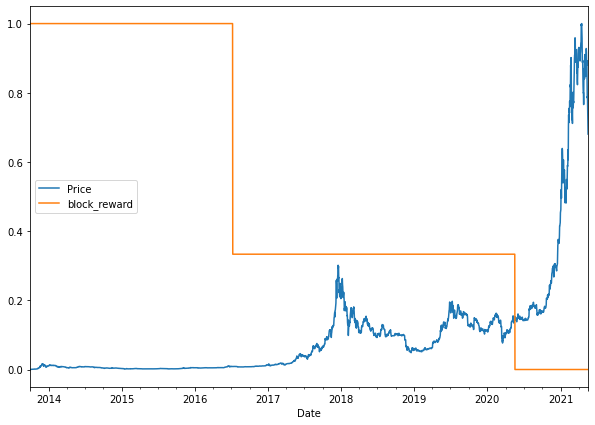

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));

## Making windowed dataset with pandas.DataFrame.shift()

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):#shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_windowed.dropna().drop('Price',axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head(),y.head()

(            block_reward     Price+1  ...     Price+6     Price+7
 Date                                  ...                        
 2013-10-08          25.0  121.794998  ...  125.455002  123.654991
 2013-10-09          25.0  123.032997  ...  108.584831  125.455002
 2013-10-10          25.0  124.049004  ...  118.674660  108.584831
 2013-10-11          25.0  125.961159  ...  121.338661  118.674660
 2013-10-12          25.0  125.279663  ...  120.655327  121.338661
 
 [5 rows x 8 columns], Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.279663
 2013-10-12    125.927498
 Name: Price, dtype: float32)

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X)*0.8)
X_train,y_train,X_test,y_test = X[:split_size],y[:split_size],X[split_size:],y[split_size:]
len(X_train), len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_train,y_train,X_test,y_test

(            block_reward      Price+1  ...      Price+6      Price+7
 Date                                   ...                          
 2013-10-08          25.0   121.794998  ...   125.455002   123.654991
 2013-10-09          25.0   123.032997  ...   108.584831   125.455002
 2013-10-10          25.0   124.049004  ...   118.674660   108.584831
 2013-10-11          25.0   125.961159  ...   121.338661   118.674660
 2013-10-12          25.0   125.279663  ...   120.655327   121.338661
 ...                  ...          ...  ...          ...          ...
 2019-11-05          12.5  9202.415039  ...  9455.724609  9458.223633
 2019-11-06          12.5  9369.627930  ...  9225.995117  9455.724609
 2019-11-07          12.5  9326.599609  ...  9131.410156  9225.995117
 2019-11-08          12.5  9335.751953  ...  9197.632812  9131.410156
 2019-11-09          12.5  9226.485352  ...  9290.896484  9197.632812
 
 [2224 rows x 8 columns], Date
 2013-10-08     123.032997
 2013-10-09     124.049004
 20

## Model 6: Dense (multivariate time series)

In [ ]:
model_6 = tf.keras.Sequential([layers.Dense(128,activation='relu'),
                               layers.Dense(HORIZON)], name='model_6')
model_6.compile(loss='mae')
model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 767.3724 - val_loss: 1166.3984
INFO:tensorflow:Assets written to: model_experiments/model_6/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 197.4127 - val_loss: 1262.0569
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 192.5594 - val_loss: 1016.3316
INFO:tensorflow:Assets written to: model_experiments/model_6/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 194.4623 - val_loss: 899.6700
INFO:tensorflow:Assets written to: model_experiments/model_6/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 188.3708 - val_loss: 921.0668
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 175.4219 - val_loss: 860.3579
INFO:tensorflow:Assets written to: model_experiments/model_6/assets
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 181.9896 - val_loss: 1326.7240
Ep

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 828.3457


828.345703125

In [ ]:
model_6 = tf.keras.models.load_model('model_experiments/model_6/')
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 601.9982


601.9981689453125

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8968.451, 8788.661, 8946.098, 8865.541, 8771.555, 8741.376,
       8698.832, 8568.975, 8482.819, 8505.599], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_test,model_6_preds)
model_6_results

{'MAE': 601.99817,
 'MAPE': 2.706288,
 'MASE': 1.057544,
 'MSE': 1285001.9,
 'RMSE': 1133.5792}

## Model 7: N-BEATS algorithm

### N-BEATS block layer

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear',name='theta')
  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output back- and forecast from theta
    backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast,forecast


In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       n_layers=4,
                                       horizon=HORIZON,
                                       n_neurons=128)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [-0.34421006  0.46761125 -0.08607194  0.6673652  -1.0505408  -0.56778616
 -0.55592555]
Forecast: -0.8882286548614502


### Preparing data

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop('Price',axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Hyperparameters for N-BEATS

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

### Residual Connections

In [ ]:
# test
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1,tensor_2])

subtracted,added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [ ]:
%%time

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast,block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f'NBeatsBlock_{i}'
  )(residuals)

  residuals = layers.subtract([residuals,backcast],name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast],name=f'add_{i}')

model_7 = tf.keras.Model(inputs=stack_input,outputs=forecast,name='model_7')

model_7.compile(loss='mae')

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 00366: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00609: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00709: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2h 26min 4s, sys: 5min 14s, total: 2h 31min 19s
Wall time: 1h 39min 53s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 472ms/step - loss: 592.1141


592.1140747070312

In [ ]:
model_7_preds = make_preds(model_7,test_dataset)

In [ ]:
model_7_results = evaluate_preds(y_test,model_7_preds)
model_7_results

{'MAE': 592.1141,
 'MAPE': 2.6782074,
 'MASE': 1.0401804,
 'MSE': 1216215.5,
 'RMSE': 1102.8217}

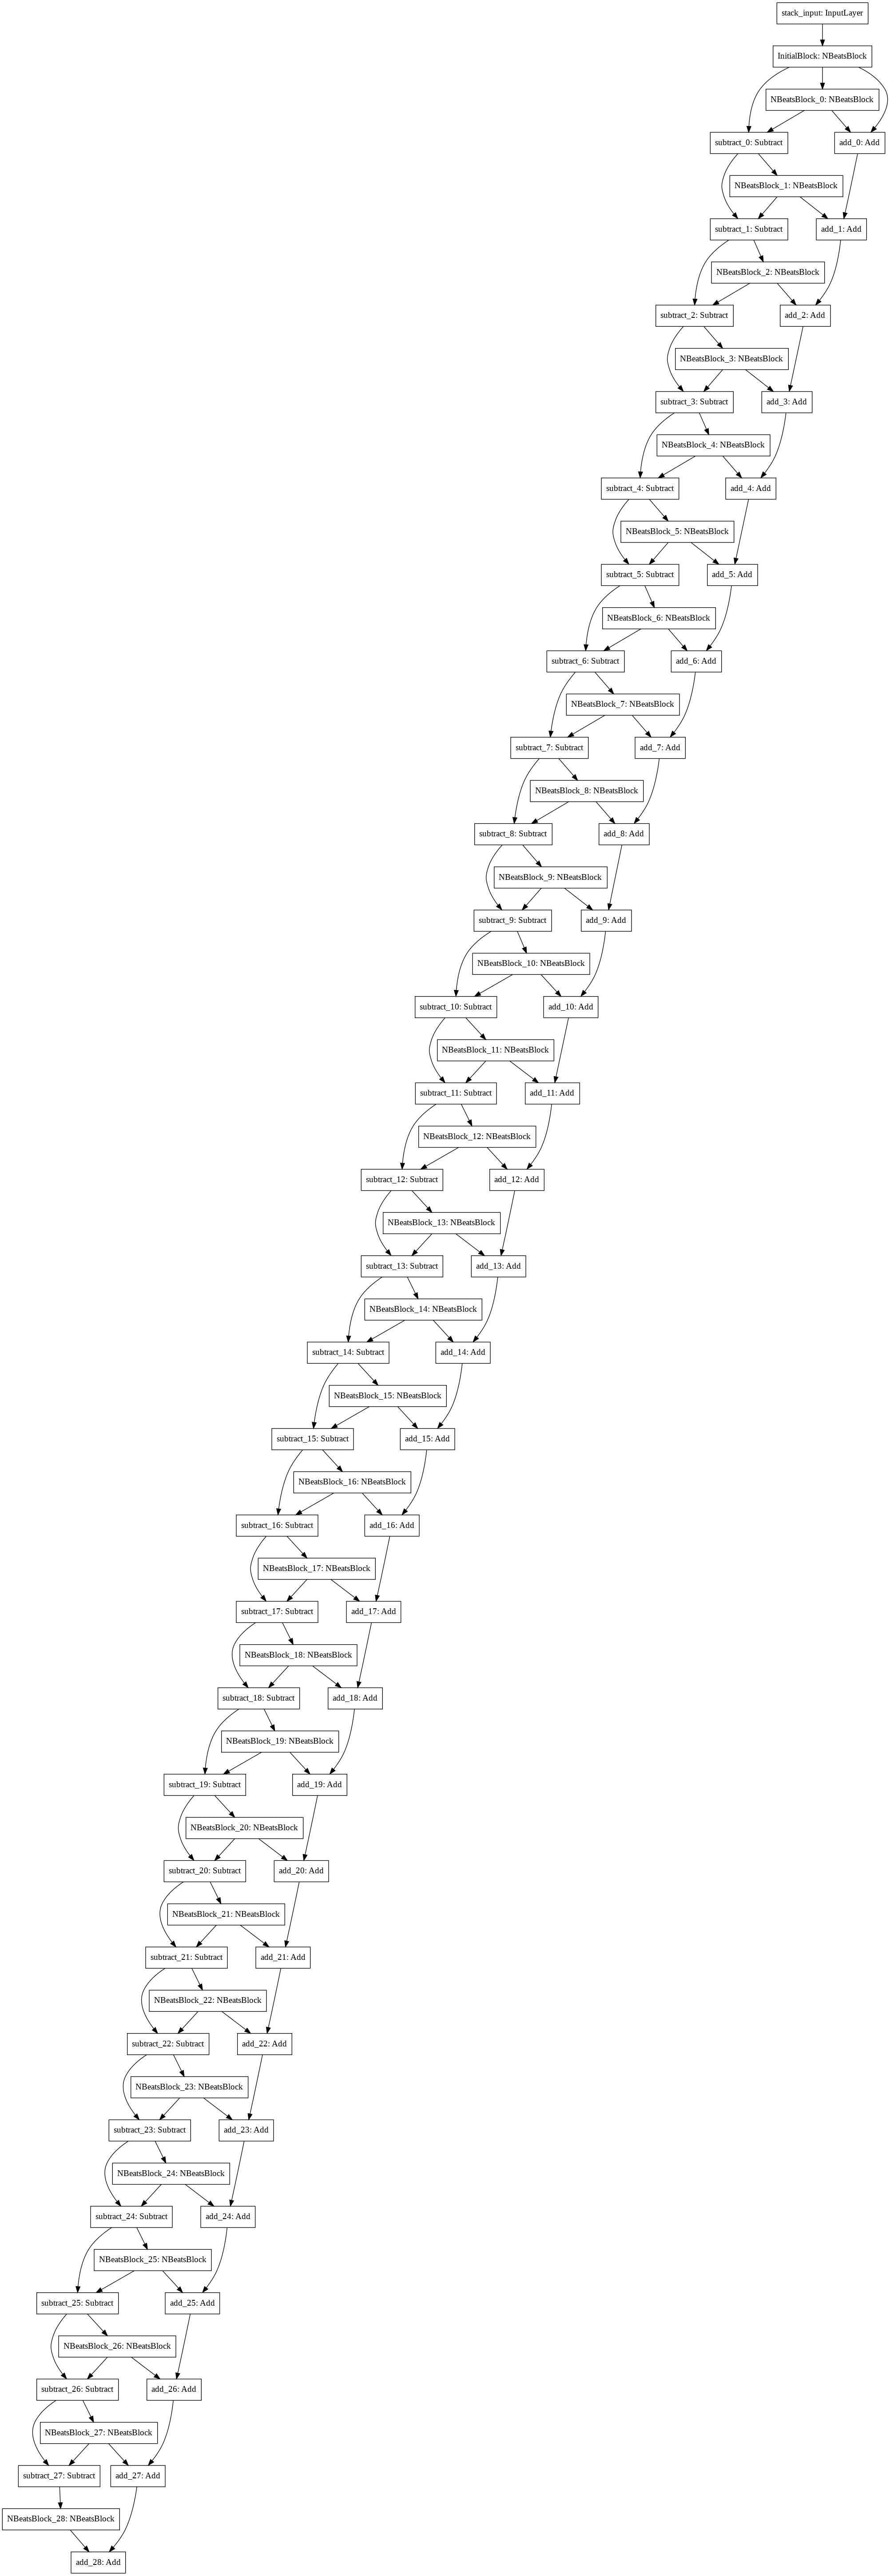

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Ensemble

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae','mse','mape']):
  '''
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  '''
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number {i}')
      model = tf.keras.Sequential([
        layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
        layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
        layers.Dense(HORIZON)
      ])
      model.compile(loss=loss_function,
                    metrics=['mae','mse'])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)
  return ensemble_models
    

In [ ]:
%%time
ensemble_model = get_ensemble_models(num_iter=5,
                                     num_epochs=100)

Optimizing model by reducing: mae for 100 epochs, model number 0
Optimizing model by reducing: mse for 100 epochs, model number 0
Optimizing model by reducing: mape for 100 epochs, model number 0
Optimizing model by reducing: mae for 100 epochs, model number 1
Optimizing model by reducing: mse for 100 epochs, model number 1
Optimizing model by reducing: mape for 100 epochs, model number 1
Optimizing model by reducing: mae for 100 epochs, model number 2
Optimizing model by reducing: mse for 100 epochs, model number 2
Optimizing model by reducing: mape for 100 epochs, model number 2
Optimizing model by reducing: mae for 100 epochs, model number 3
Optimizing model by reducing: mse for 100 epochs, model number 3
Optimizing model by reducing: mape for 100 epochs, model number 3
Optimizing model by reducing: mae for 100 epochs, model number 4
Optimizing model by reducing: mse for 100 epochs, model number 4
Optimizing model by reducing: mape for 100 epochs, model number 4
CPU times: user 1min

In [ ]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_model,
                                     data=test_dataset)
ensemble_preds

CPU times: user 148 ms, sys: 11.7 ms, total: 160 ms
Wall time: 147 ms


In [ ]:
ensemble_results = evaluate_preds(y_test,ensemble_preds)

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_median = np.median(ensemble_preds,axis=0)

In [ ]:
ensemble_mean,ensemble_median

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds,axis=0)
  interval = 1.96 * std # for 95% in normal distribution
  preds_mean = tf.reduce_mean(preds,axis=0)
  lower,upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)

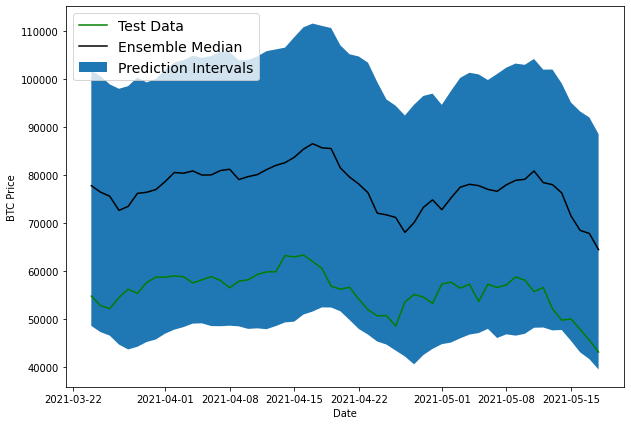

In [ ]:
ensemble_median = np.median(ensemble_preds,axis=0)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],'g',label='Test Data')
plt.plot(X_test.index[offset:],ensemble_median[offset:],'k-',label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset:],
                (lower)[offset:],
                (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left',fontsize=14)

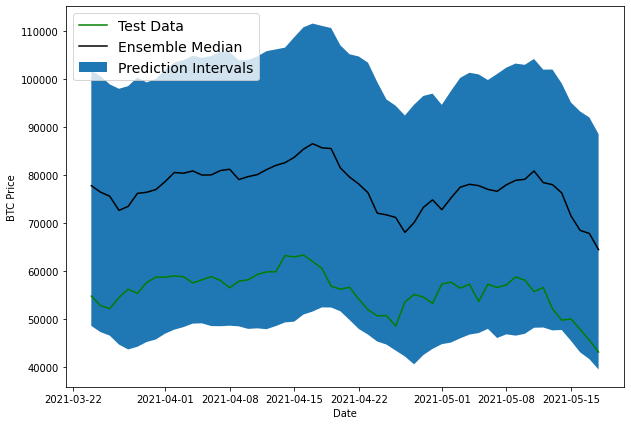

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
ensemble_results

{'MAE': 7199.0825,
 'MAPE': 36.24961,
 'MASE': 12.646794,
 'MSE': 111128020.0,
 'RMSE': 9806.054}

## Model 9: Predicting the future

In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'],axis=1).to_numpy()

y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()
len(X_all),len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
model_9 = tf.keras.Sequential([
  layers.Dense(128,activation='relu'),
  layers.Dense(128,activation='relu'),
  layers.Dense(HORIZON)
])

model_9.compile(loss='mae')

model_9.fit(dataset_all,
            epochs=100)



### Make predictions into future

In [ ]:
def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window,axis=0))
    print(future_pred)

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=14,
                                        window_size=WINDOW_SIZE)

[[59020.223]]
[[56089.59]]
[[53886.504]]
[[54050.453]]
[[52665.61]]
[[52836.44]]
[[56177.508]]
[[62761.594]]
[[60787.58]]
[[59821.977]]
[[59903.53]]
[[59956.367]]
[[62091.344]]
[[65715.94]]


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset,'D') # specificy start date, 'D' for day
  end_date = start_date + np.timedelta64(into_future,'D')
  return np.arange(start_date,end_date,dtype='datetime64[D]')

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep,type(last_timestep)

(Timestamp('2021-05-18 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=14)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])

next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 59020.223, 56089.59 , 53886.504, 54050.453, 52665.61 ,
        52836.44 , 56177.508, 62761.594, 60787.58 , 59821.977, 59903.53 ,
        59956.367, 62091.344, 65715.94 ], dtype=float32))

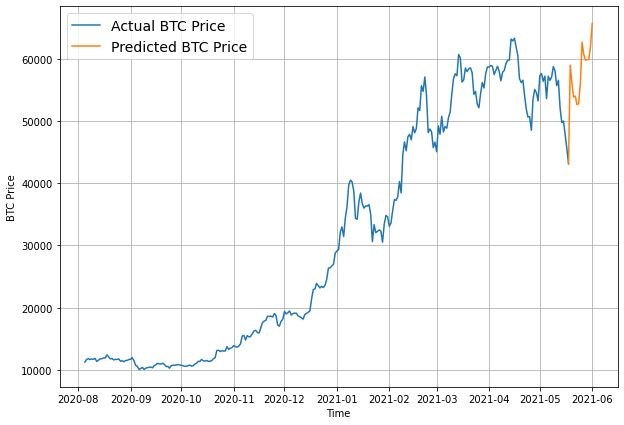

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-',label='Actual BTC Price')
plot_time_series(next_time_steps,future_forecast,format='-',label='Predicted BTC Price')

## Compare models

In [ ]:
model_results = pd.DataFrame({'naive_model': naive_results,
                              'model_1_dense': model_1_results,
                              'model_2_dense_w30': model_2_results,
                              'model_3_dense_w30_h7': model_3_results,
                              'model_4_Conv1D': model_4_results,
                              'model_5_LSTM': model_5_results,
                              'model_6_multivariante': model_6_results,
                              'model_7_NBEATS': model_7_results,
                              }).T

In [ ]:
model_results

,MAE,MSE,RMSE,MAPE,MASE
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense,627.893127,1357437.875,1165.091309,2.814929,1.103034
model_2_dense_w30,775.395020,1951160.375,1396.839478,3.444561,1.355398
model_3_dense_w30_h7,1302.900757,5805278.500,1495.124146,5.941396,2.318439
model_4_Conv1D,622.006165,1366571.750,1169.004639,2.821419,1.092692
model_5_LSTM,681.142578,1630035.625,1276.728516,3.090316,1.196579
model_6_multivariante,601.998169,1285001.875,1133.579224,2.706288,1.057544
model_7_NBEATS,592.114075,1216215.500,1102.821655,2.678207,1.040180


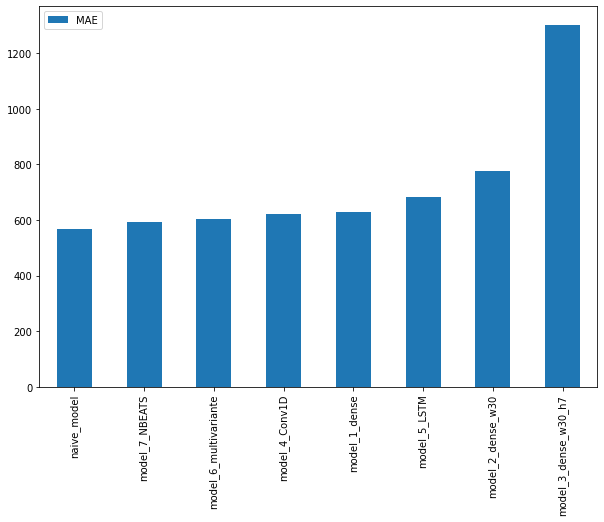

In [ ]:
model_results[['MAE']].sort_values(by='MAE').plot(figsize=(10,7), kind='bar');